# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [3]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [5]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [20]:
# Create a Beautiful Soup Object
# Create a Beautiful Soup object
# Get the HTML content from the browser
response = browser.html
temp_soup = bs(response, 'html.parser')

table = temp_soup.body.find_all('tr', class_='data-row')
print("The number of rows in the table")
len(table)

The number of rows in the table


1867

In [22]:
# Extract all rows of data

print(temp_soup)


<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [43]:


# Create an empty list
row_data = []

# Find all rows in the table
rows = temp_soup.find_all("tr")

# Loop through the rows to create a list of rows
for index, r in enumerate(rows):
    row_list = [] # an empty list for each row 
    # we might get a empty row as the table has headers 
    # to avoid that we need to skip the first row using -->
    if index == 0:
        continue 
    # Find all table cells in the row
    # NOTE: td is table cells 
    cells = r.find_all("td")
    
    # Extract text from each cell
    # cleaning the data from unecessary white space such as --> \n    2022-08-16\n
    # used text.strip() 
    for c in cells: 
        row_list.append(c.text.strip()) 
    
    # Adding  the row to row_data list
    row_data.append(row_list)

# Print the first row to verify
print(f" The first 3 rows of the table: ")
print(row_data[0:3])

 The first 3 rows of the table: 
[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']]


In [45]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# defining the column names for the dataframe
columns_header = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
# creating the data frame and assigning column names to the data frame based on the column header or list 
mar_temp_data_DF= pd.DataFrame(row_data, columns = columns_header)


In [47]:
# Confirm DataFrame was created successfully
mar_temp_data_DF.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [48]:
# Examine data type of each column
mar_temp_data_DF.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [54]:
# Change data types for data analysis
changed_dataT = mar_temp_data_DF.astype ({
    'id': 'object',
    'terrestrial_date': 'datetime64[ns]',
    'sol': 'int', 
    'ls': 'int', 
    'month': 'int', 
    'min_temp': 'float', 
    'pressure': 'float'
})


In [55]:
# Confirm type changes were successful by examining data types again
changed_dataT.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [63]:
# 1. How many months are there on Mars?

# first we get the unique months in the month column using .unique() function
# the unique() function list or return an array the has unique months 
unique_months = changed_dataT['month'].unique()
# we use len() to count the length of the array 
no_months = len(unique_months)
print(f"The number of months on mars are: {no_months}")

The number of months on mars are: 12


In [69]:
# 2. How many sols (Martian days) worth of data are there?

# to calculate the Martian days we use the same technique we used to count the number of months in the above cells 
unique_sol = changed_dataT['sol'].unique()
no_sol = len(unique_sol)
print(f"The number of Martian days worth od data are:{no_sol}")

The number of Martian days worth od data are:1867


In [94]:
# 3. What is the average minimum temperature by month?
average_temp = changed_dataT.groupby('month')['min_temp'].mean()
print("Minimum avarage tempreture of Mars by month: ")
average_tempDF = pd.DataFrame(average_temp)
average_tempDF

Minimum avarage tempreture of Mars by month: 


,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


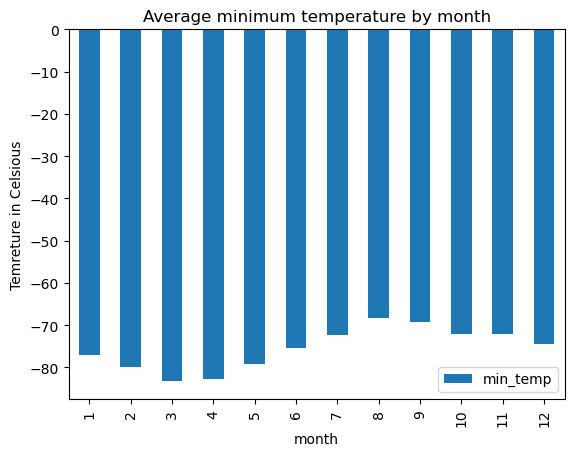

In [95]:
# Plot the average minimum temperature by month
average_tempDF.plot (kind='bar', y ='min_temp')
plt.ylabel('Temreture in Celsious')
plt.xlabel ('month')
plt.title ('Average minimum temperature by month')
plt.show ()

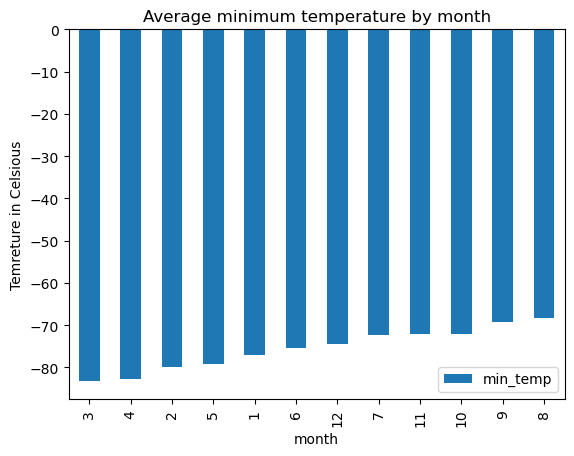

In [96]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
average_tempDF_sort = average_tempDF.sort_values(by='min_temp', ascending=True)
average_tempDF_sort.plot (kind='bar', y ='min_temp')
plt.ylabel('Temreture in Celsious')
plt.xlabel ('month')
plt.title ('Average minimum temperature by month')
plt.show ()

In [103]:
# 4. What is the average pressure by month?
average_presure = changed_dataT.groupby('month')['pressure'].mean()
print("The average pressure by month: ")
average_presureDF = pd.DataFrame(average_presure)
average_presureDF 

The average pressure by month: 


,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


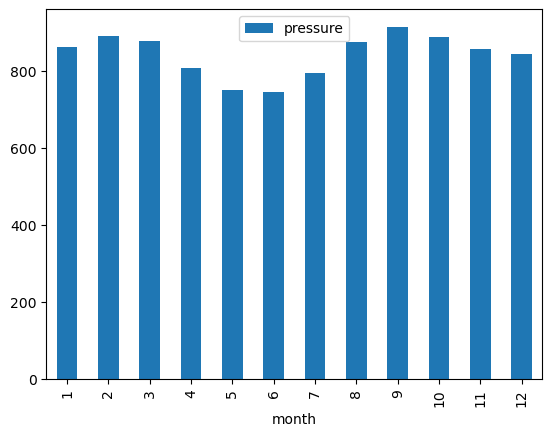

In [104]:
# Plot the average pressure by month
average_presureDF.plot(kind='bar', y='pressure')
plt.xlable = ('Atmospheric Pressure')
plt.ylable = ('month')
plt.title = ("Average Pressure by Month")
plt.show()

In [ ]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph


In [ ]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.


#### Minimum Temperature

YOUR ANALYSIS HERE

#### Atmospheric Pressure

YOUR ANALYSIS HERE

#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Write the data to a CSV


In [ ]:
browser.quit()